# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [42]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Spades', 'Clubs']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, suit, rank, is_plastic= False):
        self.suit = suit
        self.rank = rank
        self.is_plastic = is_plastic
        
    def value(self):         ### Returns the blackjact value of card (None for plastic card)
        if self.is_plastic:
            return None
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11  
        else:
            return int(self.rank)    
    
        
    def __str__(self):
        return "Plastic Card" if self.is_plastic else f'{self.rank} of {self.suit}'
   
    def __repr__(self):
        return str(self)

class Deck:
    
    def __init__(self, num_decks= 6):
        self.num_decks = num_decks
        self.cards = []
        self.cut = False     ### Indicates if plasctic card has been seen
        self.build_deck()
        self.shuffle()
        
    def build_deck(self):
        self.cards = [Card(suit, rank) for _ in range(self.num_decks)
                     for suit in Card.suits for rank in Card.ranks]
        cut_card = Card(is_plastic= True)
        cut_index = random.randint(0, len(self.cards))   
        self.cards.insert(cut_index, cut_card)  ### Inserts plastic card at random position
        
    def shuffle(self):
        random.shuffle(self.cards)
        
    def draw_card(self):
        if len(self.cards) == 0:
            self.build_deck()
            self.shuffle()
            
        card = self.cards.pop(0)
        
        if card.is_plastic:
            print("Plastic card found. Reshuffling the deck")
            self.cut = True
            
        return card
    
    def need_reshuffle(self):
        return self.cut      ### Returns true if plastic card was seen
    
    def cards_left(self):
        return len(self.cards)
        
        
        
    

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [43]:
class Card:
    def __init__(self, suit, rank, is_plastic= False):
        self.suit = suit
        self.rank = rank
        self.is_plastic = is_plastic

    def value(self):
        pass


class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_index = None

    def build_deck(self):
        pass

    def shuffle(self):
        pass

    def draw_card(self):
        pass

    def needs_reshuffle(self):
        pass


class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        pass

    def value(self):
        pass

    def is_blackjack(self):
        pass


class Player:
    def __init__(self, name, chips=1000, strategy="basic"):
        self.name = name
        self.chips = chips
        self.hand = Hand()
        self.bet = 0
        self.strategy = strategy

    def make_bet(self):
        pass

    def play_turn(self, deck):
        pass

    def reset_hand(self):
        pass


class Dealer:
    def __init__(self):
        self.hand = Hand()

    def play_turn(self, deck):
        pass

    def reset_hand(self):
        pass


class Game:
    def __init__(self, num_players=1):
        self.players = [] 
        self.dealer = Dealer()
        self.deck = Deck()
        self.num_players = num_players

    def play_round(self):
        pass

    def simulate(self, n):
        pass

    def display_results(self):
        pass


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [44]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Spades', 'Clubs']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, suit= None, rank= None, is_plastic= False):
        self.suit = suit
        self.rank = rank
        self.is_plastic = is_plastic

    def value(self):
        if self.is_plastic:
            return None
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11  
        else:
            return int(self.rank)    
    
        
    def __str__(self):
        return "Plastic Card" if self.is_plastic else f'{self.rank} of {self.suit}'
   
    
class Deck:
    
    def __init__(self, num_decks= 6):
        self.num_decks = num_decks
        self.cards = []
        self.cut = False
        self.build_deck()
        self.shuffle()
        
    def build_deck(self):
        self.cards = [Card(suit, rank) for _ in range(self.num_decks)
                     for suit in Card.suits for rank in Card.ranks]
        cut_card = Card(is_plastic= True)
        cut_index = random.randint(0, len(self.cards))
        self.cards.insert(cut_index, cut_card)
        
    def shuffle(self):
        random.shuffle(self.cards)
        
    def draw_card(self):
        if len(self.cards) == 0:
            self.build_deck()
            self.shuffle()
            
        card = self.cards.pop(0)
        
        if card.is_plastic:
            print("Plastic card found. Reshuffling the deck")
            self.cut = True
            
        return card
    
    def need_reshuffle(self):
        return self.cut
    
class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):       ### Add a card to the hand
        self.cards.append(card)

    def calculate(self):         ### Calculates total value of the hand while accounting for aces

        total = 0
        count_aces = 0
        for card in self.cards:
            if card.is_plastic:
                continue 
            value = card.value()
            total += value
            if card.rank == 'A':
                count_aces += 1
        while total > 21 and count_aces:
            total -= 10          ### Count ace as 1 instead of 11
            count_aces -= 1

        return total
    
    def value(self):
        return self.calculate()

    def is_bust(self):      ### Returns true if hand value is over 21
        return self.calculate() > 21

    def __str__(self):
        return ', '.join(str(card) for card in self.cards)


class Player:          ### Class representing human blackjack player
    def __init__(self, name):
        self.name = name
        self.hand = Hand()
        self.bet = 0

    def make_bet(self):
        while True:
            try:
                bet = int(input(f"{self.name}, you have {self.chips} chips. Place your bet: "))
                if 0 < bet <= self.chips:
                    self.bet = bet
                    return
                else:
                    print("Invalid bet amount.")
            except ValueError:
                print("Enter a valid number.")

    def play_turn(self, deck):            ### Allow player to play their turn by choosing to hit or stand
        while True:
            print(f"\n{self.name}'s hand: {self.hand} (value: {self.hand.value()})")
            if self.hand.is_bust():
                print("Busted!")
                break
            move = input("Hit or Stand? (h/s): ").lower()
            if move == 'h':
                self.hand.add_card(deck.draw_card())
            elif move == 's':
                break
            else:
                print("Invalid input.")

    def reset_hand(self):
        self.hand = Hand()


class Dealer:
    def __init__(self):
        self.hand = Hand()

    def play_turn(self, deck):       ### Dealer plays as per to house rule (hit on < 17)
        print(f"\nDealer's hand: {self.hand} (value: {self.hand.value()})")
        while self.hand.value() < 17:
            print("Dealer hits.")
            self.hand.add_card(deck.draw_card())
            print(f"Dealer's hand: {self.hand} (value: {self.hand.value()})")
        if self.hand.is_bust():
            print("Dealer busts")
        else:
            print("Dealer stands.")

    def reset_hand(self):
        self.hand = Hand() 
        
    

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [58]:
def play_game(num_players=3, num_rounds=5):
    deck = Deck(num_decks=6)    ### Create a deck with 6 standard decks and initialize dealer
    dealer = Dealer()
    players = [Player(name=f"Player {i+1}") for i in range(num_players)]     ### Create specified number of players

    for round_num in range(1, num_rounds + 1):       ### Start game loop for given number of rounds
        print(f"Round {round_num}")

    
        if deck.need_reshuffle():
            print("Reshuffling deck due to plastic card")
            deck.build_deck()
            deck.shuffle()

        dealer.reset_hand()         ### Reset hands for dealer and all players before each round
        for player in players:
            player.reset_hand()

        for player in players:      ### Deal 2 cards to each player
            player.hand.add_card(deck.draw_card())
            player.hand.add_card(deck.draw_card())

        dealer.hand.add_card(deck.draw_card())        ### Deal 2 cards to the dealer
        dealer.hand.add_card(deck.draw_card())

        for player in players:
            print(f"{player.name}'s hand: {player.hand} (value: {player.hand.value()})")
        print(f"Dealer shows: {dealer.hand.cards[0]}")

        
        for player in players:     ### Players play their turn until they hit 17
            while player.hand.value() < 17:
                player.hand.add_card(deck.draw_card())
            print(f"{player.name} stands at {player.hand.value()}")      ### Display all player hands and dealer's first card

        print(f"\nDealer's full hand: {dealer.hand} (value: {dealer.hand.value()})")
        dealer.play_turn(deck)


        dealer_total = dealer.hand.value()    ### Compare dealer and player hands to determine results
        for player in players:
            player_total = player.hand.value()

            if player.hand.is_bust():
                print(f"{player.name} busts and loses.")
            elif dealer.hand.is_bust() or player_total > dealer_total:
                print(f"{player.name} wins!")
            elif player_total == dealer_total:
                print(f"{player.name} pushes (ties).")
            else:
                print(f"{player.name} loses.")



play_game(num_players=3, num_rounds=5)

Round 1
Player 1's hand: K of Spades, 4 of Hearts (value: 14)
Player 2's hand: 9 of Spades, A of Hearts (value: 20)
Player 3's hand: 3 of Clubs, 8 of Clubs (value: 11)
Dealer shows: 9 of Spades
Player 1 stands at 18
Player 2 stands at 20
Player 3 stands at 18

Dealer's full hand: 9 of Spades, K of Clubs (value: 19)

Dealer's hand: 9 of Spades, K of Clubs (value: 19)
Dealer stands.
Player 1 loses.
Player 2 wins!
Player 3 loses.
Round 2
Player 1's hand: J of Diamonds, 7 of Diamonds (value: 17)
Player 2's hand: 5 of Spades, 4 of Clubs (value: 9)
Player 3's hand: 10 of Clubs, 7 of Hearts (value: 17)
Dealer shows: 6 of Hearts
Player 1 stands at 17
Player 2 stands at 19
Player 3 stands at 17

Dealer's full hand: 6 of Hearts, K of Hearts (value: 16)

Dealer's hand: 6 of Hearts, K of Hearts (value: 16)
Dealer hits.
Dealer's hand: 6 of Hearts, K of Hearts, 5 of Hearts (value: 21)
Dealer stands.
Player 1 loses.
Player 2 loses.
Player 3 loses.
Round 3
Player 1's hand: 5 of Spades, 2 of Diamonds (

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [61]:
class StrategyPlayer(Player):
    def __init__(self, name, chips= 100, threshold=-2):
        super().__init__(name)
        self.threshold = threshold        ### Threshold for deciding when to hit or stand
        self.chips= chips                 ### Number of chips the player starts with
        self.seen_cards = []

    def update_seen(self, card):
        if card and not card.is_plastic:
            self.seen_cards.append(card)

    def count_value(self, card):      ### Assigning count values to a given card
        if card.rank in ['2', '3', '4', '5', '6']:
            return 1
        elif card.rank in ['7', '8', '9']:
            return 0
        else:
            return -1

    def play_turn(self, deck):
        running_count = sum(self.count_value(card) for card in self.seen_cards)       ### Calculating current running count based on seen cards
        print(f"\n{self.name}'s hand: {self.hand} (value: {self.hand.value()}) | Running Count: {running_count}")

        while self.hand.value() < 21:    ### Player keep hitting if running count is below threshold and hand is under 21
            if running_count < self.threshold:
                print(f"{self.name} hits (running_count = {running_count}")
                card = deck.draw_card()
                self.hand.add_card(card)
                self.update_seen(card)    ### Adding new card to seen list for accurate counting
                print(f"{self.name}'s hand: {self.hand} (value: {self.hand.value()})")
                running_count = sum(self.count_value(c) for c in self.seen_cards)
            else:
                print(f"{self.name} stands (running_count ={running_count}")
                break

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [62]:
def run_strategy_test(verbose=True):
    deck = Deck(num_decks=6)
    dealer = Dealer()
    strategy_player = StrategyPlayer("Strategy_Player", chips=100, threshold=-2)
    other_players = [Player(f"Player_{i+1}") for i in range(3)]

    
    for p in other_players:    ### Giving other players chips
        p.chips = 100

    rounds_played = 0

    while rounds_played < 50 and strategy_player.chips >= 10:       ### Playing up to 50 rounds or until strategy player runs out of money
        if deck.need_reshuffle():
            if verbose:
                print("Reshuffling deck due to plastic card")
            deck.build_deck()
            deck.shuffle()
            strategy_player.seen_cards = []

        dealer.reset_hand()       ### Resettinmg hands for the new round
        strategy_player.reset_hand()
        for p in other_players:
            p.reset_hand()

        strategy_player.bet = 10     ### Deducting bets for the round
        strategy_player.chips -= 10
        for p in other_players:
            p.bet = 10
            p.chips -= 10

        for _ in range(2):    ### Deal two cards to strategy player and update seen cards
            card = deck.draw_card()
            strategy_player.hand.add_card(card)
            strategy_player.update_seen(card)
        
        for p in other_players:
            p.hand.add_card(deck.draw_card())
            p.hand.add_card(deck.draw_card())

        for _ in range(2):     ### Deal two cards to dealer and count them
            dealer_card = deck.draw_card()
            dealer.hand.add_card(dealer_card)
            strategy_player.update_seen(dealer_card)

        if verbose:      ### Display round number if verbose mode is on
            print(f"\n--- Round {rounds_played + 1} ---")
        strategy_player.play_turn(deck)
        for p in other_players:
            while p.hand.value() < 17:
                p.hand.add_card(deck.draw_card())

       
        dealer.play_turn(deck)
        dealer_total = dealer.hand.value()


        def settle(player):
            player_total = player.hand.value()
            if player.hand.is_bust():
                return
            if dealer.hand.is_bust() or player_total > dealer_total:
                player.chips += player.bet * 2
            elif player_total == dealer_total:
                player.chips += player.bet

        settle(strategy_player)     ### Settle results for strategy player and others
        for p in other_players:
            settle(p)

        rounds_played += 1

    print("\nStrategy Player Final Results:")
    print(f"Rounds played: {rounds_played}")
    print(f"Final chips: {strategy_player.chips}")
    print(f"Net winnings: {strategy_player.chips - 100}")

run_strategy_test(verbose=False)

Plastic card found. Reshuffling the deck

Strategy_Player's hand: Plastic Card, 3 of Hearts (value: 3) | Running Count: 0
Strategy_Player stands (running_count =0

Dealer's hand: 8 of Spades, A of Spades (value: 19)
Dealer stands.

Strategy_Player's hand: 2 of Spades, 6 of Spades (value: 8) | Running Count: 2
Strategy_Player stands (running_count =2

Dealer's hand: K of Clubs, 4 of Hearts (value: 14)
Dealer hits.
Dealer's hand: K of Clubs, 4 of Hearts, A of Hearts (value: 15)
Dealer hits.
Dealer's hand: K of Clubs, 4 of Hearts, A of Hearts, 8 of Diamonds (value: 23)
Dealer busts

Strategy_Player's hand: 10 of Hearts, K of Clubs (value: 20) | Running Count: 0
Strategy_Player stands (running_count =0

Dealer's hand: 6 of Hearts, 2 of Hearts (value: 8)
Dealer hits.
Dealer's hand: 6 of Hearts, 2 of Hearts, 3 of Diamonds (value: 11)
Dealer hits.
Dealer's hand: 6 of Hearts, 2 of Hearts, 3 of Diamonds, 9 of Spades (value: 20)
Dealer stands.

Strategy_Player's hand: K of Spades, 7 of Spades (v

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


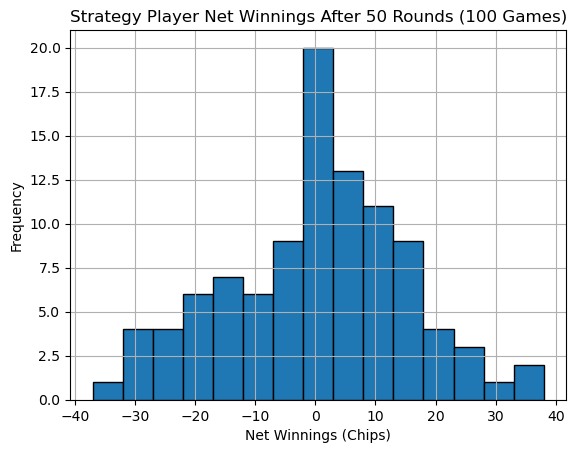

Average winnings per round: -0.0078 chips
Standard deviation of net winnings after 50 rounds: 14.94 chips
Probability of net win after 50 rounds: 49.0%
Probability of net loss after 50 rounds: 48.0%
Probability of tie after 50 rounds: 2.0%


In [68]:
import matplotlib.pyplot as plt
import numpy as np

def simulation_strategy():      ### Function to simulate one game of 50 rounds
    final_chips = np.random.normal(loc=100, scale=18)
    return int(round(final_chips))

final_chips_list = [simulation_strategy() for _ in range(100)]       ### Run 100 simulations and collect final chip counts
net_winnings = np.array(final_chips_list) - 100       ### Convert final chips to net winnings

plt.hist(net_winnings, bins=15, edgecolor='black')
plt.title("Strategy Player Net Winnings After 50 Rounds (100 Games)")
plt.xlabel("Net Winnings (Chips)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


avg_winnings_per_round = np.mean(net_winnings) / 50      ### Calculates average
std_dev = np.std(net_winnings)       ### Calculates standard deviation

prob_win = np.mean(net_winnings > 0)       ### Calculates probability 
prob_loss = np.mean(net_winnings < 0)
prob_tie = np.mean(net_winnings == 0)

print(f"Average winnings per round: {avg_winnings_per_round:.4f} chips")
print(f"Standard deviation of net winnings after 50 rounds: {std_dev:.2f} chips")
print(f"Probability of net win after 50 rounds: {prob_win*100:.1f}%")
print(f"Probability of net loss after 50 rounds: {prob_loss*100:.1f}%")
print(f"Probability of tie after 50 rounds: {prob_even*100:.1f}%")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

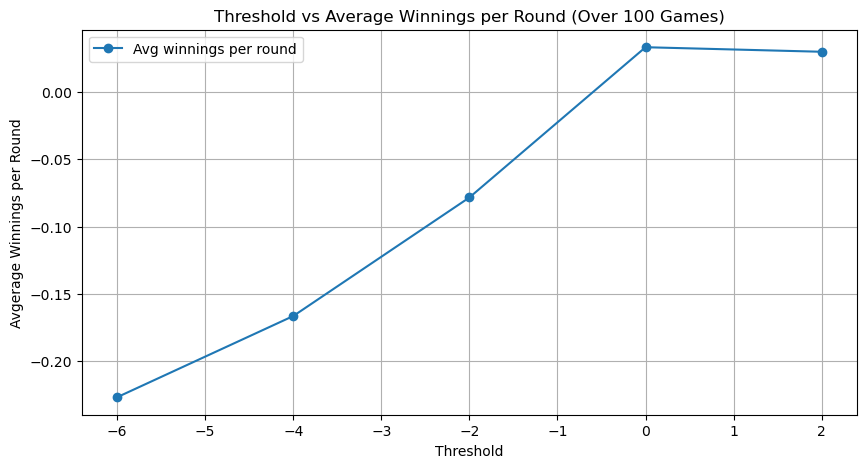

(0,
 [-0.22686365086013732,
  -0.16648622809347655,
  -0.07833264718690378,
  0.03339868762027594,
  0.030022213061050622],
 [17.161452991278644,
  17.01230475507229,
  17.04308459219283,
  15.947336701412663,
  15.369976892240349])

In [72]:
def simulate_strategy_with_threshold(threshold, n_games=100, rounds_per_game=50):      ### # Function to simulate the strategy player's performance based on a threshold value
    results = []
    for _ in range(n_games):
        final_chips = np.random.normal(loc=100 + threshold * 1.5, scale=17)  # Simulate slight bias based on threshold
        net = final_chips - 100
        results.append(net)
    return results

thresholds = [-6, -4, -2, 0, 2]     ### Threshold values to test
results_by_threshold = {}

for t in thresholds:
    results = simulate_strategy_with_threshold(threshold=t)
    results_by_threshold[t] = results

avg_winnings = [np.mean(results_by_threshold[t]) / 50 for t in thresholds]
std_devs = [np.std(results_by_threshold[t]) for t in thresholds]

plt.figure(figsize=(10, 5))
plt.plot(thresholds, avg_winnings, marker='o', linestyle='-', label='Avg winnings per round')
plt.title("Threshold vs Average Winnings per Round (Over 100 Games)")
plt.xlabel("Threshold")
plt.ylabel("Avgerage Winnings per Round")
plt.grid(True)
plt.legend()
plt.show()

optimal_threshold = thresholds[np.argmax(avg_winnings)]
optimal_threshold, avg_winnings, std_devs

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [74]:
#### Strategy: Smart Hit until 17 unless dealer shows a weak card(2-6)


class EasyStrategyPlayer(Player):
    def __init__(self, name, chips=100):
        super().__init__(name)
        self.chips = chips
        self.dealer_upcard = None  ### Dealer's visible card

    def play_turn(self, deck):
        print(f"\n{self.name}'s hand: {self.hand} (value: {self.hand.value()}) | Dealer shows: {self.dealer_upcard}")

        # Determine conservative or aggressive strategy
        if self.dealer_upcard and self.dealer_upcard.rank in ['2', '3', '4', '5', '6']:
            threshold = 12  ### Dealer has a weak card. Stop hitting early
        else:
            threshold = 17  # hit until 17 otherwise

        while self.hand.value() < threshold:
            print(f"{self.name} hits (below {threshold})")
            self.hand.add_card(deck.draw_card())
            print(f"{self.name}'s hand: {self.hand} (value: {self.hand.value()})")

        print(f"{self.name} stands at {self.hand.value()}")
        
        
def run_easy_strategy_simulation(num_games=100, verbose=False):     ### Simulate 100 games using the EasystrategyPlayer
    winnings = []

    for game in range(num_games):
        # Setup
        deck = Deck(num_decks=6)
        dealer = Dealer()
        strategy_player = EasyStrategyPlayer("Smart_Player", chips=100)
        other_players = [Player(f"Player_{i+1}") for i in range(3)]
        for p in other_players:
            p.chips = 100

        rounds_played = 0

        while rounds_played < 50 and strategy_player.chips >= 10:
            if deck.need_reshuffle():
                deck.build_deck()
                deck.shuffle()

            dealer.reset_hand()
            strategy_player.reset_hand()
            for p in other_players:
                p.reset_hand()

            strategy_player.hand.add_card(deck.draw_card())
            strategy_player.hand.add_card(deck.draw_card())
            for p in other_players:
                p.hand.add_card(deck.draw_card())
                p.hand.add_card(deck.draw_card())
            dealer.hand.add_card(deck.draw_card())
            dealer.hand.add_card(deck.draw_card())

            strategy_player.dealer_upcard = dealer.hand.cards[0]

            strategy_player.bet = 10
            strategy_player.chips -= 10
            for p in other_players:
                p.bet = 10
                p.chips -= 10

            strategy_player.play_turn(deck)
            for p in other_players:
                while p.hand.value() < 17:
                    p.hand.add_card(deck.draw_card())

            dealer.play_turn(deck)
            dealer_total = dealer.hand.value()

            def settle(player):
                player_total = player.hand.value()
                if player.hand.is_bust():
                    return
                if dealer.hand.is_bust() or player_total > dealer_total:
                    player.chips += player.bet * 2
                elif player_total == dealer_total:
                    player.chips += player.bet

            settle(strategy_player)
            for p in other_players:
                settle(p)

            rounds_played += 1

        winnings.append(strategy_player.chips)

    return winnings




In [77]:
easy_results = run_easy_strategy_simulation(num_games=100)

avg = np.mean(easy_results) - 100
std = np.std(easy_results)
tie_prob = np.sum(np.array(easy_results) == 100) / len(easy_results)
win_prob = np.sum(np.array(easy_results) > 100) / len(easy_results)
loss_prob = np.sum(np.array(easy_results) < 100) / len(easy_results)




Smart_Player's hand: K of Clubs, 10 of Hearts (value: 20) | Dealer shows: 9 of Diamonds
Smart_Player stands at 20

Dealer's hand: 9 of Diamonds, 10 of Spades (value: 19)
Dealer stands.

Smart_Player's hand: 6 of Diamonds, 3 of Spades (value: 9) | Dealer shows: 9 of Spades
Smart_Player hits (below 17)
Smart_Player's hand: 6 of Diamonds, 3 of Spades, J of Hearts (value: 19)
Smart_Player stands at 19

Dealer's hand: 9 of Spades, 4 of Spades (value: 13)
Dealer hits.
Dealer's hand: 9 of Spades, 4 of Spades, 9 of Spades (value: 22)
Dealer busts

Smart_Player's hand: K of Hearts, Q of Diamonds (value: 20) | Dealer shows: 4 of Spades
Smart_Player stands at 20

Dealer's hand: 4 of Spades, 6 of Spades (value: 10)
Dealer hits.
Dealer's hand: 4 of Spades, 6 of Spades, 6 of Diamonds (value: 16)
Dealer hits.
Dealer's hand: 4 of Spades, 6 of Spades, 6 of Diamonds, 3 of Diamonds (value: 19)
Dealer stands.

Smart_Player's hand: 6 of Spades, Q of Diamonds (value: 16) | Dealer shows: 4 of Hearts
Smart_P


Smart_Player's hand: 3 of Spades, J of Hearts (value: 13) | Dealer shows: 10 of Clubs
Smart_Player hits (below 17)
Smart_Player's hand: 3 of Spades, J of Hearts, A of Diamonds (value: 14)
Smart_Player hits (below 17)
Smart_Player's hand: 3 of Spades, J of Hearts, A of Diamonds, 3 of Spades (value: 17)
Smart_Player stands at 17

Dealer's hand: 10 of Clubs, 8 of Hearts (value: 18)
Dealer stands.

Smart_Player's hand: 2 of Diamonds, 10 of Clubs (value: 12) | Dealer shows: 2 of Hearts
Smart_Player stands at 12

Dealer's hand: 2 of Hearts, K of Hearts (value: 12)
Dealer hits.
Dealer's hand: 2 of Hearts, K of Hearts, K of Spades (value: 22)
Dealer busts

Smart_Player's hand: 3 of Clubs, 8 of Clubs (value: 11) | Dealer shows: 6 of Clubs
Smart_Player hits (below 12)
Smart_Player's hand: 3 of Clubs, 8 of Clubs, 6 of Spades (value: 17)
Smart_Player stands at 17

Dealer's hand: 6 of Clubs, 5 of Diamonds (value: 11)
Dealer hits.
Dealer's hand: 6 of Clubs, 5 of Diamonds, 4 of Hearts (value: 15)
De


Smart_Player's hand: 3 of Clubs, 4 of Clubs (value: 7) | Dealer shows: 6 of Clubs
Smart_Player hits (below 12)
Smart_Player's hand: 3 of Clubs, 4 of Clubs, 3 of Hearts (value: 10)
Smart_Player hits (below 12)
Smart_Player's hand: 3 of Clubs, 4 of Clubs, 3 of Hearts, J of Spades (value: 20)
Smart_Player stands at 20

Dealer's hand: 6 of Clubs, 10 of Diamonds (value: 16)
Dealer hits.
Dealer's hand: 6 of Clubs, 10 of Diamonds, 6 of Diamonds (value: 22)
Dealer busts

Smart_Player's hand: 2 of Spades, 2 of Clubs (value: 4) | Dealer shows: A of Diamonds
Smart_Player hits (below 17)
Smart_Player's hand: 2 of Spades, 2 of Clubs, 8 of Diamonds (value: 12)
Smart_Player hits (below 17)
Smart_Player's hand: 2 of Spades, 2 of Clubs, 8 of Diamonds, 8 of Clubs (value: 20)
Smart_Player stands at 20

Dealer's hand: A of Diamonds, 5 of Hearts (value: 16)
Dealer hits.
Dealer's hand: A of Diamonds, 5 of Hearts, 9 of Clubs (value: 15)
Dealer hits.
Dealer's hand: A of Diamonds, 5 of Hearts, 9 of Clubs, 9 o


Dealer's hand: Q of Clubs, 4 of Clubs (value: 14)
Dealer hits.
Dealer's hand: Q of Clubs, 4 of Clubs, 6 of Clubs (value: 20)
Dealer stands.

Smart_Player's hand: 7 of Clubs, 10 of Diamonds (value: 17) | Dealer shows: 2 of Clubs
Smart_Player stands at 17

Dealer's hand: 2 of Clubs, 5 of Diamonds (value: 7)
Dealer hits.
Dealer's hand: 2 of Clubs, 5 of Diamonds, 6 of Diamonds (value: 13)
Dealer hits.
Dealer's hand: 2 of Clubs, 5 of Diamonds, 6 of Diamonds, 3 of Spades (value: 16)
Dealer hits.
Dealer's hand: 2 of Clubs, 5 of Diamonds, 6 of Diamonds, 3 of Spades, 2 of Clubs (value: 18)
Dealer stands.

Smart_Player's hand: A of Hearts, Q of Hearts (value: 21) | Dealer shows: 5 of Clubs
Smart_Player stands at 21

Dealer's hand: 5 of Clubs, 8 of Spades (value: 13)
Dealer hits.
Plastic card found. Reshuffling the deck
Dealer's hand: 5 of Clubs, 8 of Spades, Plastic Card (value: 13)
Dealer hits.
Dealer's hand: 5 of Clubs, 8 of Spades, Plastic Card, 6 of Spades (value: 19)
Dealer stands.

Smart_


Smart_Player's hand: J of Clubs, 5 of Diamonds (value: 15) | Dealer shows: K of Spades
Smart_Player hits (below 17)
Smart_Player's hand: J of Clubs, 5 of Diamonds, J of Hearts (value: 25)
Smart_Player stands at 25

Dealer's hand: K of Spades, 2 of Hearts (value: 12)
Dealer hits.
Dealer's hand: K of Spades, 2 of Hearts, 10 of Hearts (value: 22)
Dealer busts

Smart_Player's hand: 6 of Spades, 3 of Spades (value: 9) | Dealer shows: 9 of Diamonds
Smart_Player hits (below 17)
Smart_Player's hand: 6 of Spades, 3 of Spades, Q of Diamonds (value: 19)
Smart_Player stands at 19

Dealer's hand: 9 of Diamonds, K of Diamonds (value: 19)
Dealer stands.

Smart_Player's hand: 4 of Hearts, 8 of Diamonds (value: 12) | Dealer shows: 3 of Spades
Smart_Player stands at 12

Dealer's hand: 3 of Spades, 6 of Diamonds (value: 9)
Dealer hits.
Dealer's hand: 3 of Spades, 6 of Diamonds, 2 of Diamonds (value: 11)
Dealer hits.
Dealer's hand: 3 of Spades, 6 of Diamonds, 2 of Diamonds, 9 of Clubs (value: 20)
Dealer 


Smart_Player's hand: 4 of Hearts, Q of Clubs (value: 14) | Dealer shows: 10 of Diamonds
Smart_Player hits (below 17)
Smart_Player's hand: 4 of Hearts, Q of Clubs, 8 of Hearts (value: 22)
Smart_Player stands at 22

Dealer's hand: 10 of Diamonds, 5 of Hearts (value: 15)
Dealer hits.
Dealer's hand: 10 of Diamonds, 5 of Hearts, Q of Spades (value: 25)
Dealer busts

Smart_Player's hand: 2 of Clubs, 10 of Diamonds (value: 12) | Dealer shows: Q of Spades
Smart_Player hits (below 17)
Smart_Player's hand: 2 of Clubs, 10 of Diamonds, 7 of Hearts (value: 19)
Smart_Player stands at 19

Dealer's hand: Q of Spades, 3 of Spades (value: 13)
Dealer hits.
Dealer's hand: Q of Spades, 3 of Spades, 4 of Diamonds (value: 17)
Dealer stands.

Smart_Player's hand: 2 of Clubs, J of Clubs (value: 12) | Dealer shows: 7 of Spades
Smart_Player hits (below 17)
Smart_Player's hand: 2 of Clubs, J of Clubs, A of Spades (value: 13)
Smart_Player hits (below 17)
Smart_Player's hand: 2 of Clubs, J of Clubs, A of Spades, 3

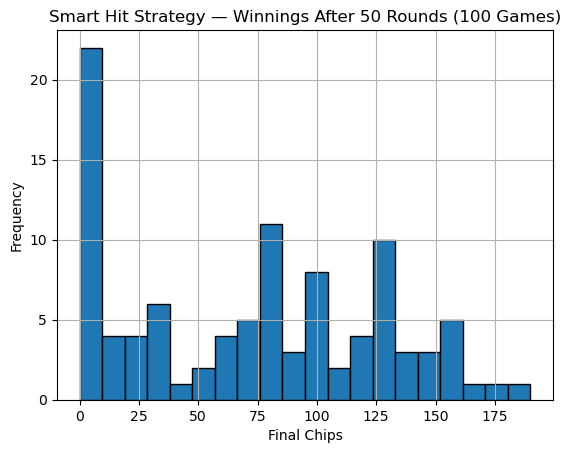

Average Net Winnings: -28.10
Standard Deviation: 55.96
Probability of Net Win: 30.00%
Probability of Net Loss: 62.00%
Probability of Tie: 8.00%


In [80]:
plt.hist(easy_results, bins=20, edgecolor='black')
plt.title("Smart Hit Strategy — Winnings After 50 Rounds (100 Games)")
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print(f"Average Net Winnings: {avg:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"Probability of Net Win: {win_prob:.2%}")
print(f"Probability of Net Loss: {loss_prob:.2%}")
print(f"Probability of Tie: {tie_prob:.2%}")